## Identifying Optimal Markets for E-Learning Programming Courses Advertisement

#### Objective:
The objective of this project is to identify the most promising markets for advertising e-learning programming courses. With a focus on web and mobile development, as well as other domains such as data science and game development, the aim is to allocate advertising resources effectively to maximize reach and impact.

for this analysis, i am going to use the data gathered by [freeCodeCamp](https://www.freecodecamp.org/). freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository.](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style as style
style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_columns', 150)
%matplotlib inline

In [2]:
survey_data = pd.read_csv('data/2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
# check number of rows and columns
print(f'Number of rows in the dataset: {survey_data.shape[0]}')
print(f'Number of columns in the dataset: {survey_data.shape[1]}')

Number of rows in the dataset: 18175
Number of columns in the dataset: 136


In [4]:
# first five rows
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [5]:
# percentage of null values present in each features
round((survey_data.isnull().sum() / len(survey_data)) * 100, 2)

Age                    15.45
AttendedBootcamp        2.56
BootcampFinish         94.12
BootcampLoanYesNo      94.06
BootcampName           94.78
                       ...  
YouTubeMIT             81.69
YouTubeMozillaHacks    96.58
YouTubeOther           93.68
YouTubeSimplilearn     98.89
YouTubeTheNewBoston    83.71
Length: 136, dtype: float64

<Axes: >

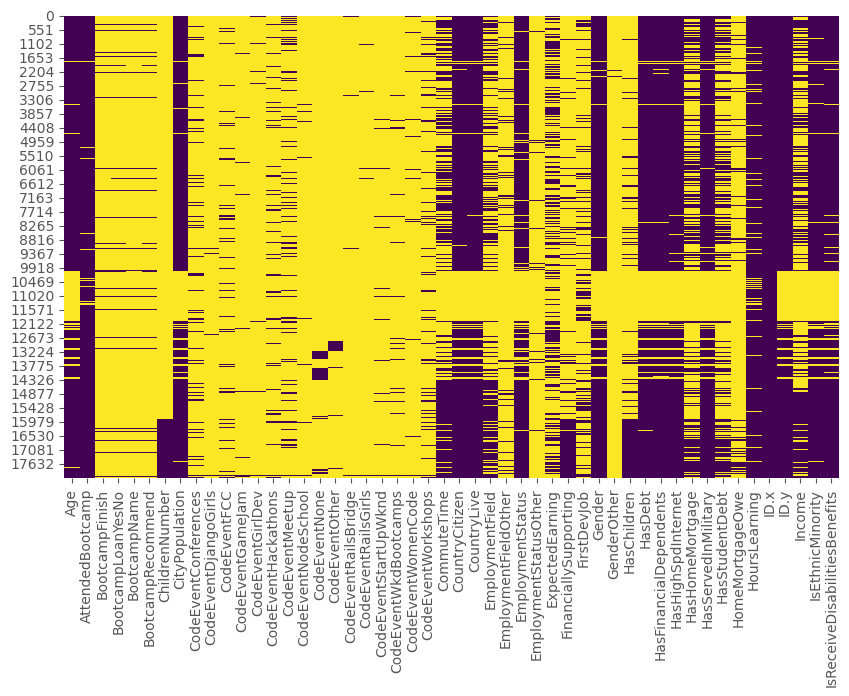

In [6]:
plt.figure(figsize = (10, 6))
null_values = survey_data.isnull()
sns.heatmap(survey_data.isnull().iloc[:, :50], cmap='viridis', cbar=False)

<Axes: >

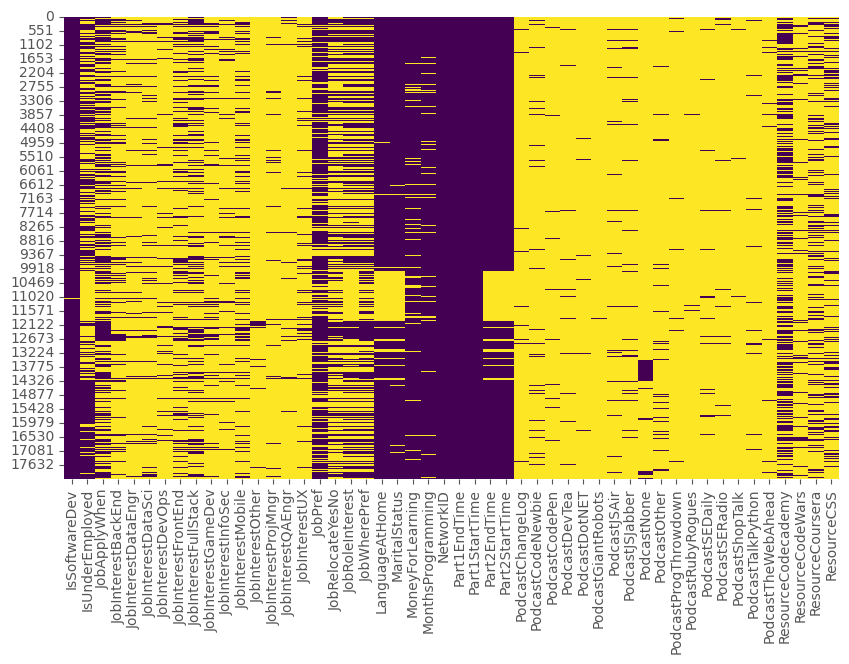

In [7]:
plt.figure(figsize = (10, 6))
sns.heatmap(survey_data.isnull().iloc[:, 50:100], cmap='viridis', cbar=False)

<Axes: >

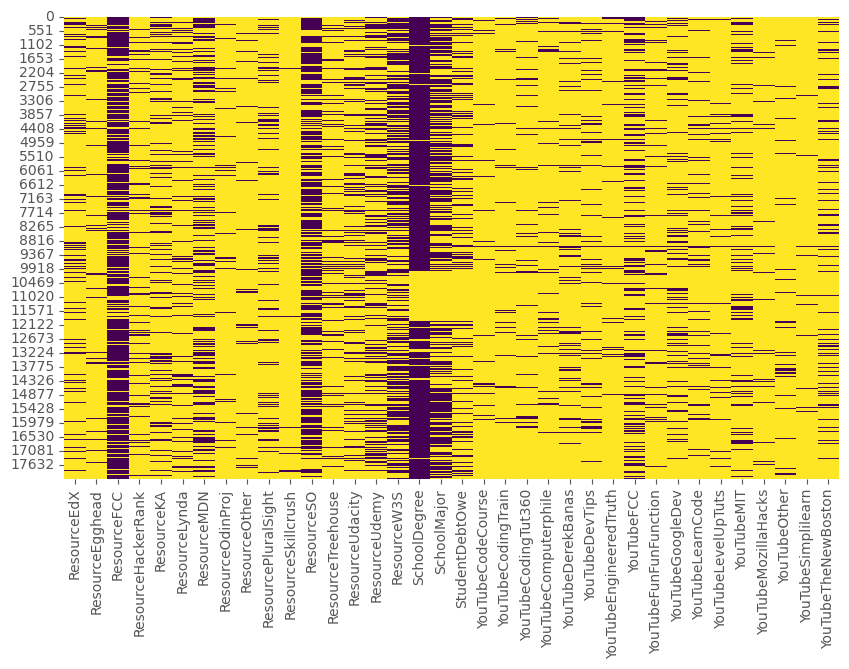

In [8]:
plt.figure(figsize = (10, 6))
sns.heatmap(survey_data.isnull().iloc[:, 100:150], cmap='viridis', cbar=False)

We can see that many columns have significant amount of null values. we need to decide whether to keep the columns by filling the null values or drop. and we do not need all these columns for our further analysis. 

In [9]:
print(survey_data.columns.to_list()) # printing all the column names

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWh

 most column names are self-explanatory, but it seems that we don't have a clear documentation explaining each column name. However, you can find more information in the `raw-data` folder of the [repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

By only selecting the following columns we are narrowing down the analysis to most useful columns. 

In [10]:
survey_data_updated = survey_data[['Age', 'AttendedBootcamp', 'CountryCitizen', 'CountryLive', 
           'EmploymentField', 'EmploymentStatus', 'Gender', 'HasChildren', 
           'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 
           'HasStudentDebt', 'HoursLearning', 'JobRoleInterest',
           'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 
           'SchoolDegree', 'SchoolMajor']].copy()

In [11]:
survey_data_updated.head()

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor
0,27.0,0.0,Canada,Canada,software development and IT,Employed for wages,female,NaN,1.0,0.0,0.0,0.0,15.0,NaN,married or domestic partnership,150.0,6.0,"some college credit, no degree",NaN
1,34.0,0.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,10.0,Full-Stack Web Developer,"single, never married",80.0,6.0,"some college credit, no degree",NaN
2,21.0,0.0,United States of America,United States of America,software development and IT,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,25.0,"Front-End Web Developer, Back-End Web Develo...","single, never married",1000.0,5.0,high school diploma or equivalent (GED),NaN
3,26.0,0.0,Brazil,Brazil,software development and IT,Employed for wages,male,0.0,1.0,1.0,1.0,0.0,14.0,"Front-End Web Developer, Full-Stack Web Deve...",married or domestic partnership,0.0,5.0,"some college credit, no degree",NaN
4,20.0,0.0,Portugal,Portugal,NaN,Not working but looking for work,female,NaN,0.0,0.0,NaN,NaN,10.0,"Full-Stack Web Developer, Information Security...","single, never married",0.0,24.0,bachelor's degree,Information Technology


In [12]:
survey_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     15367 non-null  float64
 1   AttendedBootcamp        17709 non-null  float64
 2   CountryCitizen          15382 non-null  object 
 3   CountryLive             15336 non-null  object 
 4   EmploymentField         8116 non-null   object 
 5   EmploymentStatus        14345 non-null  object 
 6   Gender                  15454 non-null  object 
 7   HasChildren             3858 non-null   float64
 8   HasDebt                 15291 non-null  float64
 9   HasFinancialDependents  15329 non-null  float64
 10  HasHomeMortgage         6397 non-null   float64
 11  HasStudentDebt          6402 non-null   float64
 12  HoursLearning           16714 non-null  float64
 13  JobRoleInterest         6992 non-null   object 
 14  MaritalStatus           15335 non-null

In [13]:
round((survey_data_updated.isnull().sum() / len(survey_data_updated)) * 100)

Age                       15.0
AttendedBootcamp           3.0
CountryCitizen            15.0
CountryLive               16.0
EmploymentField           55.0
EmploymentStatus          21.0
Gender                    15.0
HasChildren               79.0
HasDebt                   16.0
HasFinancialDependents    16.0
HasHomeMortgage           65.0
HasStudentDebt            65.0
HoursLearning              8.0
JobRoleInterest           62.0
MaritalStatus             16.0
MoneyForLearning           9.0
MonthsProgramming          6.0
SchoolDegree              15.0
SchoolMajor               52.0
dtype: float64

In the new dataset we can see many columns such as `EmploymentField`, `HasChildren`, `HasHomeMortgage`, `HasStudentDebt`, `JobRoleInterest`, and `SchoolMajor` have more than 50% null values.

### Dealing with null Values

### Checking for Sample Representativity

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

We have the sample data to analyze, but before we need to figure out whether it's representative for our population of interest and if it has the right categories of people for our purpose.

The `JobRoleInterest` column looks like a good point to start with since it describes the role (or roles) each respondent is interested in for future working:

In [14]:
survey_data_updated['JobRoleInterest'].value_counts(normalize = True) * 100

JobRoleInterest
Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                

We can make a couple of observations here:

- The majority of people (~18%) are interested in becoming web developers (especially full-stack and front-end).
- Some people that have several potential jobs in mind.

As for the second observation, let's check the percentage of such people:

In [15]:
job_roles = survey_data_updated['JobRoleInterest'].dropna()
job_roles_list = job_roles.str.split(',')
job_roles_list

def job_interests_of_candidates(job_rols_list):
    job_roles = job_rols_list.apply(lambda x: 'Multiple Jobs' if len(x) > 1 else 'Only One Job')
    return job_roles
def calculate_percentage(series):
    return round(series.value_counts(normalize = True) * 100, 0)

def create_pretty_table(series):
    print(series.to_markdown(headers = ['Jobs', 'Percentage(%)'], tablefmt='pretty'))
    
def draw_plot(series, title, x_label):
    locations = ['top', 'bottom', 'left', 'right']
    series = series.sort_index(ascending = False)
    fig, ax = plt.subplots(figsize=(10, 2))
    bars = ax.barh(series.index, series, height = 0.3, color = 'blue')
    ax.set_xlabel(x_label)
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='left', va='center')
        
    for location in locations:
        ax.spines[location].set_visible(False)
    ax.tick_params(bottom = False, left = False)
    x_tick_positions = ax.get_xticks()
    y_tick_positions = ax.get_yticks()
    min_y = min(b.get_y() for b in bars)
    
    ax.text(x = x_tick_positions[0] , y = 1.30, s = title, weight='bold', size = 15)   
    ax.text(x = x_tick_positions[0] ,y=min_y - 0.7, s = '©ARUN' + ' '*126 + 'Source:  freeCodeCamp',color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=10)
    plt.show()


+---------------+---------------+
|     Jobs      | Percentage(%) |
+---------------+---------------+
| Multiple Jobs |     68.0      |
| Only One Job  |     32.0      |
+---------------+---------------+


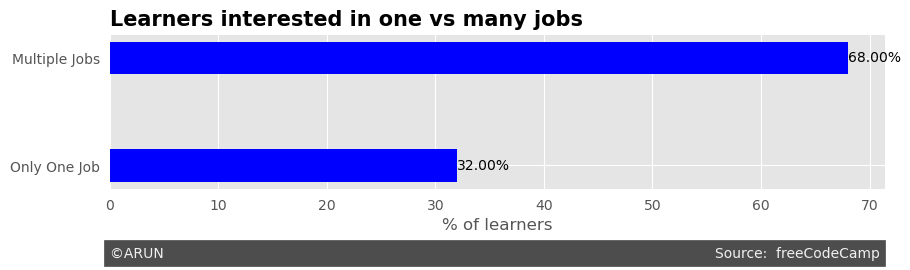

In [16]:
job_interested = job_interests_of_candidates(job_roles_list)
percentage = calculate_percentage(job_interested)
create_pretty_table(percentage)
title = 'Learners interested in one vs many jobs'
x_label = '% of learners'
draw_plot(percentage,title,x_label )

The great majority of learners (68.00%) are interested in several potential jobs instead of only one. This is a positive tendency for our e-learning company offering various courses, because some of such students can probably even decide to follow several courses, at least at the beginning.

The focus of the company's courses is on `web` and `mobile development`. Let's check how many people are interested in at least one of these two subjects:

+-------+---------------+
| Jobs  | Percentage(%) |
+-------+---------------+
| True  |     86.0      |
| False |     14.0      |
+-------+---------------+


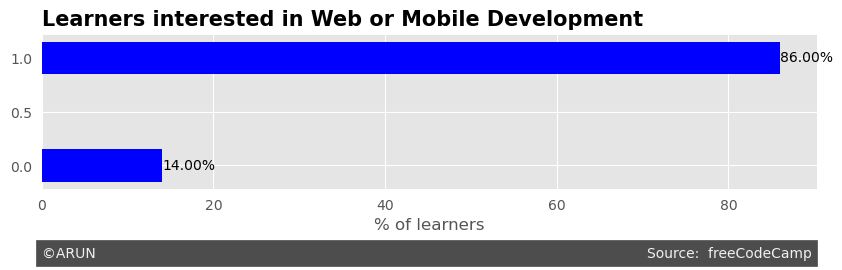

In [17]:
web_mobile_dev = survey_data_updated['JobRoleInterest'].str.contains(('Web Developer|Mobile Developer'))
percentage = calculate_percentage(web_mobile_dev)
create_pretty_table(percentage)
title = 'Learners interested in Web or Mobile Development'
x_label = '% of learners'
draw_plot(percentage, title, x_label)

From the above plot we can see that majority of the learners(86.00%) are interested in either Web or Mobile development. 

### New Coders - Locations and Densities

The next analysis we are going to do is to check the location of the new coders. in the dataset we have two columns specifying the locations `CountryCitizen` and `CountryLive`.

`CountryCitizen` column tells the citizenship of the candidate where as `CountryLive` column specify the country where the candidate currently living. so for the analysis `CountryLive` column is useful.

In [18]:
survey_data_updated[['CountryCitizen', 'CountryLive']]

,CountryCitizen,CountryLive
0,Canada,Canada
1,United States of America,United States of America
2,United States of America,United States of America
3,Brazil,Brazil
4,Portugal,Portugal
...,...,...
18170,Indonesia,Indonesia
18171,Nigeria,Nigeria
18172,South Africa,South Africa
18173,United Kingdom,United Kingdom


In [19]:
survey_data_updated = survey_data_updated[survey_data_updated['JobRoleInterest'].notnull()] # taking the rows with not null values in the CountryLive column
survey_data_updated.head()

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor
1,34.0,0.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,10.0,Full-Stack Web Developer,"single, never married",80.0,6.0,"some college credit, no degree",NaN
2,21.0,0.0,United States of America,United States of America,software development and IT,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,25.0,"Front-End Web Developer, Back-End Web Develo...","single, never married",1000.0,5.0,high school diploma or equivalent (GED),NaN
3,26.0,0.0,Brazil,Brazil,software development and IT,Employed for wages,male,0.0,1.0,1.0,1.0,0.0,14.0,"Front-End Web Developer, Full-Stack Web Deve...",married or domestic partnership,0.0,5.0,"some college credit, no degree",NaN
4,20.0,0.0,Portugal,Portugal,NaN,Not working but looking for work,female,NaN,0.0,0.0,NaN,NaN,10.0,"Full-Stack Web Developer, Information Security...","single, never married",0.0,24.0,bachelor's degree,Information Technology
6,29.0,0.0,United Kingdom,United Kingdom,NaN,Employed for wages,female,NaN,1.0,0.0,1.0,1.0,16.0,Full-Stack Web Developer,married or domestic partnership,0.0,12.0,"some college credit, no degree",NaN


In [20]:
def count_candidate_countries(df):
    top_10_rel_freq = df['CountryLive'].value_counts()[:10]
    top_10_abs_freq = round((df['CountryLive'].value_counts(normalize = True) * 100))[:10]   
    countries = top_10_rel_freq.index
    rel_freq_vals = top_10_rel_freq.values
    abs_fre_vals = top_10_abs_freq.values
    new_df = pd.DataFrame({'countries': countries, 'relative_frequncy': rel_freq_vals, 'absolute_frequency': abs_fre_vals})
    return new_df
    

def draw_plot(df):
    locations = ['top', 'bottom', 'left', 'right']
    fig, ax = plt.subplots(figsize = (10, 6))
    bars = ax.barh(df['countries'], df['absolute_frequency'], color = 'blue')
    ax.invert_yaxis()
    for bar in bars:
        width = bar.get_width()
        height = bar.get_y() + bar.get_height() / 2
        ax.text(width, height, f'{width:.2f}%', ha='left', va='center')
        ax.set_ylabel('Countries')
        ax.set_xlabel('% of Coders')
        
        
    for location in locations:
        ax.spines[location].set_visible(False)
    ax.tick_params(bottom = False, left = False)
    x_tick_positions = ax.get_xticks()
    y_tick_positions = ax.get_yticks()
    min_y = min(b.get_y() for b in bars)
    max_y = max(b.get_y() for b in bars)
    
    
    ax.text(x = x_tick_positions[0] , y = max_y - 9.8, s = 'Top 10 Countries with potential customers in %', weight='bold', size = 15)   
    ax.text(x = x_tick_positions[0] ,y=min_y + 12, s = '©ARUN' + ' '*126 + 'Source: freeCodeCamp',color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=10)
    plt.show()

In [21]:
countries_df = count_candidate_countries(survey_data_updated)
print(countries_df.to_markdown(tablefmt='pretty'))

+---+--------------------------+-------------------+--------------------+
|   |        countries         | relative_frequncy | absolute_frequency |
+---+--------------------------+-------------------+--------------------+
| 0 | United States of America |       3125        |        46.0        |
| 1 |          India           |        528        |        8.0         |
| 2 |      United Kingdom      |        315        |        5.0         |
| 3 |          Canada          |        260        |        4.0         |
| 4 |          Poland          |        131        |        2.0         |
| 5 |          Brazil          |        129        |        2.0         |
| 6 |         Germany          |        125        |        2.0         |
| 7 |        Australia         |        112        |        2.0         |
| 8 |          Russia          |        102        |        1.0         |
| 9 |         Ukraine          |        89         |        1.0         |
+---+--------------------------+------

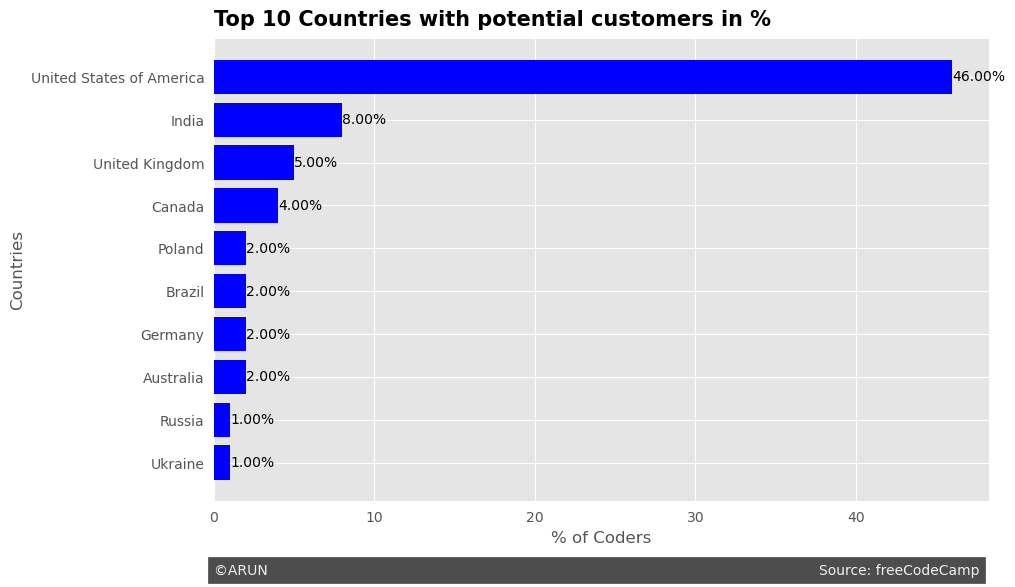

In [22]:
draw_plot(countries_df)

46% of our potential customers live in the `USA`, so we can consider this country as the best market to choose for advertisement. However, based on the table and graph above, we can't be sure about the second best market: even though India is the runner-up, only 8% of our potential customers live there, which is not much different from the third-ranked UK (5%).

Hence, now we found useful information about the location of new coders, but we can't stop the analysis here and need to go more in-depth before making a decision.

### Spending Money for Learning

Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: `the US`, `India`, `the United Kingdom`, and `Canada`. 
Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [23]:
# Replacing 0 months (for the students who had just started learning programming) with 1 
# to avoid dividing by 0
survey_data_updated['MonthsProgramming'] = survey_data_updated['MonthsProgramming'].apply(lambda x: 1 if x==0 else x)

# Calculating the amount of money per month for each respondent
survey_data_updated['MoneyPerMonth'] = survey_data_updated['MoneyForLearning']/survey_data_updated['MonthsProgramming']

# Finding the % of missing values in the `MoneyPerMonth` column
print('% of missing values in the `MoneyPerMonth` column:',\
round(survey_data_updated['MoneyPerMonth'].isnull().sum()*100/len(survey_data_updated),0))

% of missing values in the `MoneyPerMonth` column: 10.0


The rows with missing values in the `MoneyPerMonth` and `CountryLive` columns don't represent any interest for our further analysis (since we need exactly the information about the country and money per month), so we'll drop them:



In [24]:
survey_data_updated = survey_data_updated.dropna(subset = ['MoneyPerMonth', 'CountryLive'])

Group the remaining data by the `CountryLive` column` and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [25]:
countries = ['United States of America', 'India',  'United Kingdom', 'Canada']

def find_mean_value(df, countries, column = 'MoneyPerMonth'):
    groupd_data_mean = df.groupby('CountryLive')[column].mean()
    countries_of_interest_mean = round(groupd_data_mean[countries],3)
    return countries_of_interest_mean 
def find_median_value(df, countries, column = 'MoneyPerMonth'):
    groupd_data_median = df.groupby('CountryLive')[column].median()
    countries_of_interest_median = round(groupd_data_median[countries],3)
    return countries_of_interest_median

In [26]:
countries_for_ad = find_mean_value(survey_data_updated,countries)
print('Average amount spend by students in \"US\", \"India\", \"UK\" and \"Canada\"')
print(countries_for_ad.to_markdown(tablefmt='pretty', headers = ['Countries', 'Money per Month']))

Average amount spend by students in "US", "India", "UK" and "Canada"
+--------------------------+-----------------+
|        Countries         | Money per Month |
+--------------------------+-----------------+
| United States of America |     227.998     |
|          India           |     135.101     |
|      United Kingdom      |     45.534      |
|          Canada          |     113.511     |
+--------------------------+-----------------+


In [27]:
countries_for_ad_median = find_median_value(survey_data_updated,countries)
print('Average amount spend by students in \"US\", \"India\", \"UK\" and \"Canada\"')
print(countries_for_ad_median.to_markdown(tablefmt='pretty', headers = ['Countries', 'Money per Month']))

Average amount spend by students in "US", "India", "UK" and "Canada"
+--------------------------+-----------------+
|        Countries         | Money per Month |
+--------------------------+-----------------+
| United States of America |      3.333      |
|          India           |       0.0       |
|      United Kingdom      |       0.0       |
|          Canada          |       0.0       |
+--------------------------+-----------------+


The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies)), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

In [28]:
def draw_plot_mean_Spending(df):
    locations = ['top', 'bottom', 'left', 'right']
    fig, ax = plt.subplots(figsize = (10, 3))
    bars = ax.barh(df.index, df, height = 0.5, color = 'blue')
    for bar in bars:
        width = bar.get_width()
        height = bar.get_y() + bar.get_height() / 2
        ax.text(width, height, f'{width:.2f}', ha='left', va='center')
        ax.set_ylabel('Countries')
        ax.set_xlabel('Amount spent per month(USD)')
     
    for location in locations:
        ax.spines[location].set_visible(False)
    ax.tick_params(bottom = False, left = False)
    x_tick_positions = ax.get_xticks()
    y_tick_positions = ax.get_yticks()
    min_y = min(b.get_y() for b in bars)
    max_y = max(b.get_y() for b in bars)
    
    
    ax.text(x = x_tick_positions[0] , y = max_y + 1, s = 'Top 4 Countries spending per month for studies on an average', weight='bold', size = 15)
    ax.text(x = x_tick_positions[0] ,y=min_y-1.5, s = '©ARUN' + ' '*126 + 'Source: freeCodeCamp',color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=10)
    
    plt.show()

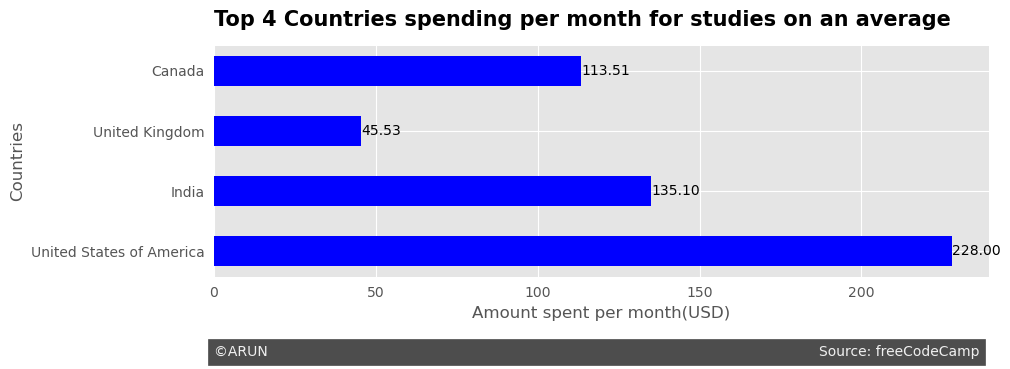

In [29]:
draw_plot_mean_Spending(countries_for_ad)

### Dealing with Extreme Outliers


In [30]:
def draw_box_plot(data, 
                  column = 'CountryLive', 
                  y_axis = 'MoneyPerMonth',
                  string = 'United States of America|India|United Kingdom|Canada'):
    
    fig, ax = plt.subplots(figsize = (10,6))
    
    ax = sns.boxplot(x = column, 
                     y = y_axis, 
                     data = data[data[column].str.contains(string)]
                    )
    ax.set_ylabel('Money per month ($)')
    ax.set_xlabel('Country')
    ax.set_title('Money Per Month by Country')
    plt.show()

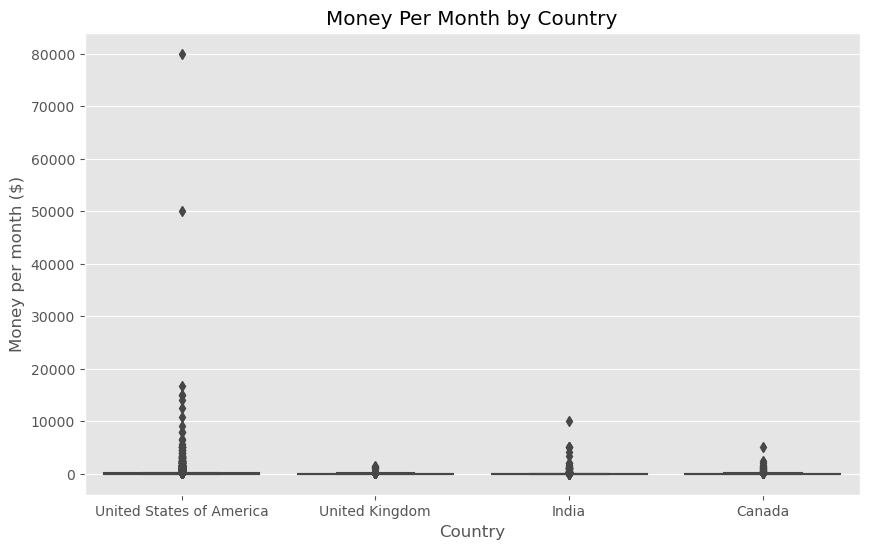

In [31]:
draw_box_plot(survey_data_updated)

From the above box plot of The USA, India, The UK and Canada, we could conclude that there is outliers in the data. in the boxplot of USA we could see two extreme otliers. Even though they can be correct values (maybe the amount of money paid ahead for some super-expensive course, for example), they look off anyway and significantly distort the overall picture. Because of them, we can't say much about India, the UK, and Canada; also, it's impossible to locate the real position of the mean values  on the distributions. Let's eliminate these outliers and recompute the mean values for money per month by country.

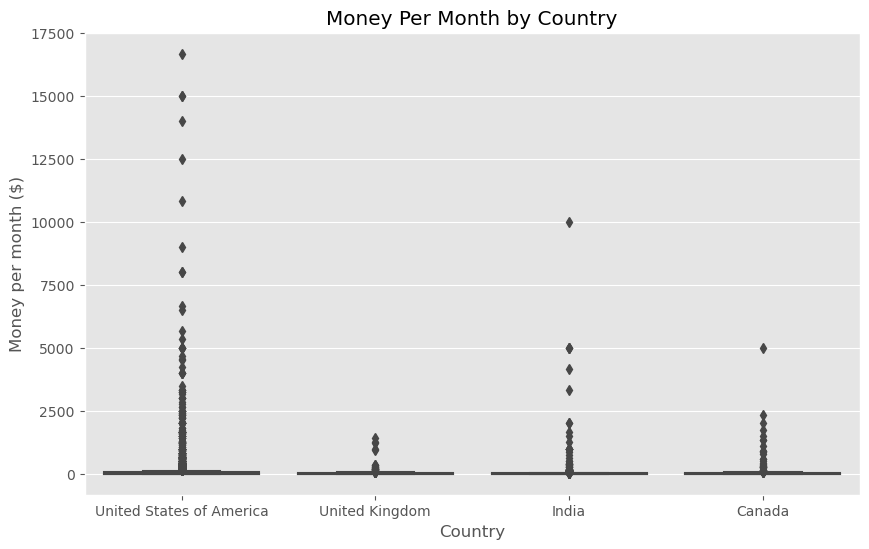

In [32]:
survey_data_updated = survey_data_updated[survey_data_updated['MoneyPerMonth'] < 20000]
draw_box_plot(survey_data_updated)

In [33]:
countries_mean = find_mean_value(survey_data_updated,countries)
print('Average amount spend by students in \"US\", \"India\", \"UK\" and \"Canada\"')
print(countries_mean.to_markdown(tablefmt='pretty', headers = ['Countries', 'Money per Month']))

Average amount spend by students in "US", "India", "UK" and "Canada"
+--------------------------+-----------------+
|        Countries         | Money per Month |
+--------------------------+-----------------+
| United States of America |      183.8      |
|          India           |     135.101     |
|      United Kingdom      |     45.534      |
|          Canada          |     113.511     |
+--------------------------+-----------------+


We can see a few extreme outliers for India (values over $2500 per month),, but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [34]:
india_outliers = survey_data_updated[(survey_data_updated['CountryLive'] == 'India') &
                                     (survey_data_updated['MoneyPerMonth'] > 2500)]

In [37]:
india_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
1728,24.0,0.0,India,India,NaN,A stay-at-home parent or homemaker,male,NaN,0.0,0.0,NaN,NaN,30.0,"User Experience Designer, Mobile Developer...","single, never married",20000.0,4.0,bachelor's degree,Computer Programming,5000.000000
1755,20.0,0.0,India,India,NaN,Not working and not looking for work,male,NaN,0.0,0.0,NaN,NaN,10.0,"Information Security, Full-Stack Web Developer...","single, never married",50000.0,15.0,bachelor's degree,Computer Science,3333.333333
7989,28.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,20.0,"User Experience Designer, Back-End Web Devel...",married or domestic partnership,5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,5000.000000
8126,22.0,0.0,India,India,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,80.0,"Back-End Web Developer, Full-Stack Web Develop...","single, never married",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,5000.000000
13398,19.0,0.0,India,India,NaN,Unable to work,male,NaN,0.0,0.0,NaN,NaN,30.0,Mobile Developer,"single, never married",20000.0,2.0,bachelor's degree,Computer Science,10000.000000
15587,27.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,36.0,"Full-Stack Web Developer, Data Scientist","single, never married",100000.0,24.0,bachelor's degree,Communications,4166.666667


It results that these 6 people hadn't attended any bootcamp. Moreover, some of them have debts, including student debts, and financial dependents. Most probably, these outliers derive from some misunderstanding of the survey questions. Anyway, it's better to exclude them from further analysis:

In [38]:
survey_data_updated.drop(india_outliers.index, inplace = True)

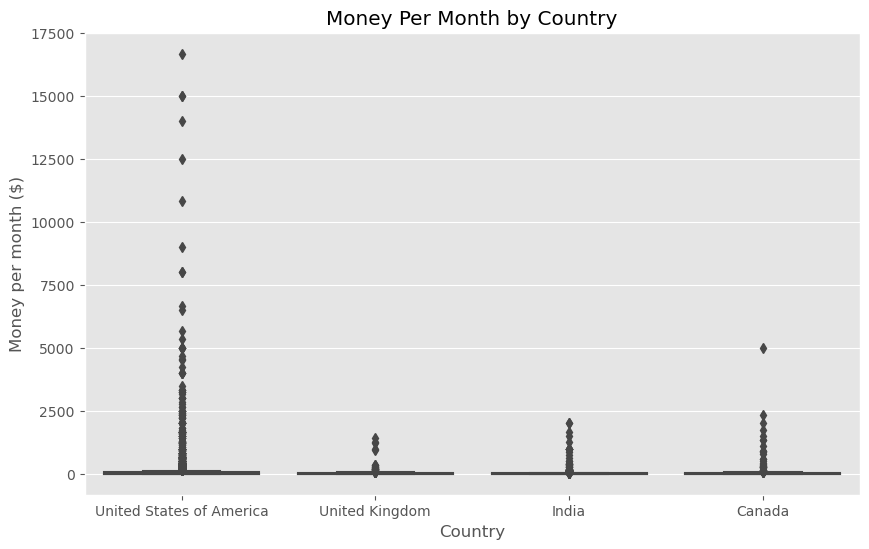

In [39]:
draw_box_plot(survey_data_updated)

Now, let's look at the other outliers for the USA, those with the values more than $7,500:

In [42]:
usa_outliers = survey_data_updated[(survey_data_updated['CountryLive'] == 'United States of America') &
                                  (survey_data_updated['MoneyPerMonth'] > 7500)]
usa_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
718,26.0,1.0,United States of America,United States of America,architecture or physical engineering,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,35.0,"User Experience Designer, Full-Stack Web Dev...","single, never married",8000.0,1.0,bachelor's degree,Architecture,8000.000000
3184,34.0,1.0,NaN,United States of America,software development and IT,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,10.0,"Quality Assurance Engineer, DevOps / SysAd...","single, never married",9000.0,1.0,"some college credit, no degree",NaN,9000.000000
3930,31.0,0.0,United States of America,United States of America,NaN,Not working and not looking for work,male,NaN,1.0,0.0,0.0,1.0,50.0,"DevOps / SysAdmin, Front-End Web Developer...",married or domestic partnership,65000.0,6.0,bachelor's degree,Biology,10833.333333
6805,46.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,45.0,"Full-Stack Web Developer, Game Developer, Pr...",married or domestic partnership,15000.0,1.0,bachelor's degree,Business Administration and Management,15000.000000
7198,32.0,0.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,0.0,1.0,4.0,"Full-Stack Web Developer, Back-End Web Developer","single, never married",70000.0,5.0,"professional degree (MBA, MD, JD, etc.)",Computer Science,14000.000000
9778,33.0,1.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,0.0,1.0,40.0,"Full-Stack Web Developer, Data Engineer, Qua...","single, never married",8000.0,1.0,master's degree (non-professional),Chemical Engineering,8000.000000
16650,29.0,0.0,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,1.0,1.0,1.0,1.0,40.0,"Product Manager, Data Engineer, Full-Stack W...",married or domestic partnership,200000.0,12.0,associate's degree,Computer Programming,16666.666667
16997,27.0,0.0,United States of America,United States of America,health care,Employed for wages,female,1.0,1.0,1.0,0.0,1.0,12.0,"Mobile Developer, Game Developer, User Exp...","single, never married",12500.0,1.0,"some college credit, no degree",NaN,12500.000000
17231,50.0,0.0,Kenya,United States of America,NaN,Not working but looking for work,female,1.0,0.0,1.0,NaN,NaN,1.0,Front-End Web Developer,married or domestic partnership,30000.0,2.0,bachelor's degree,Computer Programming,15000.000000


Also among these respondents, some people hadn't attended any bootcamp before the survey. Moreover, some of these people have debts and financial dependents, so their spending large amounts of money per month, and especially with no clear clue to which learning resource, makes these values look suspicious.

Another interesting insight is that some of the respondents above (some of those who attended a bootcamp) had been learning for 3 or less months by that moment. It can mean that they paid in advance a big sum of money for their bootcamp, and were not supposed to pay during the next months. Anyway, their large expenses, divided by 1, or 2, or 3 months, gave very high and non-representative values of money per month.

We'll exclude from our analysis both the respondents who didn't attend any bootcamp and those who attended for a very short period (<=3 months):

In [43]:
survey_data_updated.drop(usa_outliers.index, inplace = True)

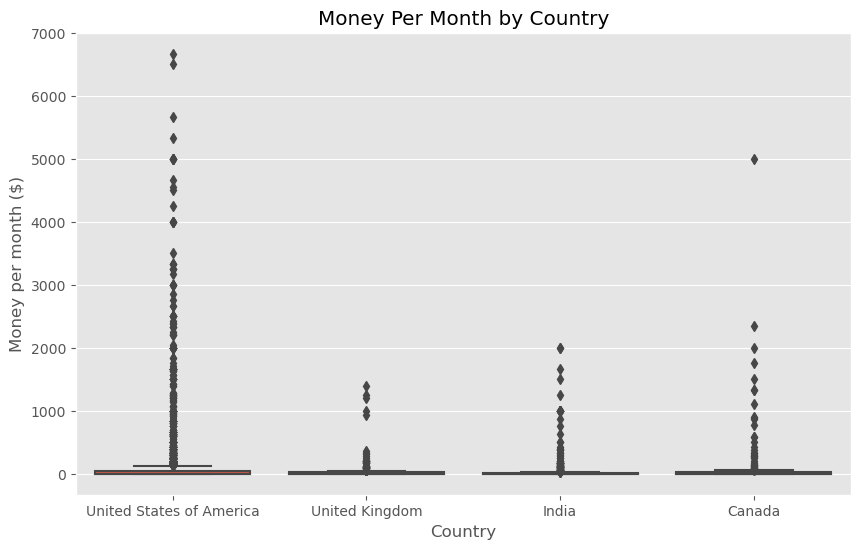

In [44]:
draw_box_plot(survey_data_updated)

In [45]:
countries_mean = find_mean_value(survey_data_updated,countries)
print('Average amount spend by students in \"US\", \"India\", \"UK\" and \"Canada\"')
print(countries_mean.to_markdown(tablefmt='pretty', headers = ['Countries', 'Money per Month']))

Average amount spend by students in "US", "India", "UK" and "Canada"
+--------------------------+-----------------+
|        Countries         | Money per Month |
+--------------------------+-----------------+
| United States of America |     147.063     |
|          India           |     65.759      |
|      United Kingdom      |     45.534      |
|          Canada          |     113.511     |
+--------------------------+-----------------+


Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly $5000 per month. Let's examine this person in more depth.

In [46]:
canada_outliers = survey_data_updated[(survey_data_updated['CountryLive'] == 'Canada') &
                                  (survey_data_updated['MoneyPerMonth'] > 3000)]
canada_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
13659,24.0,1.0,Canada,Canada,finance,Employed for wages,male,NaN,1.0,0.0,1.0,0.0,10.0,"Mobile Developer, Full-Stack Web Developer, ...","single, never married",10000.0,2.0,bachelor's degree,Finance,5000.0


In [47]:
survey_data_updated.drop(canada_outliers.index, inplace = True)

Average amount spend by students in "US", "India", "UK" and "Canada"
+--------------------------+-----------------+
|        Countries         | Money per Month |
+--------------------------+-----------------+
| United States of America |     147.063     |
|          India           |     65.759      |
|      United Kingdom      |     45.534      |
|          Canada          |     93.065      |
+--------------------------+-----------------+


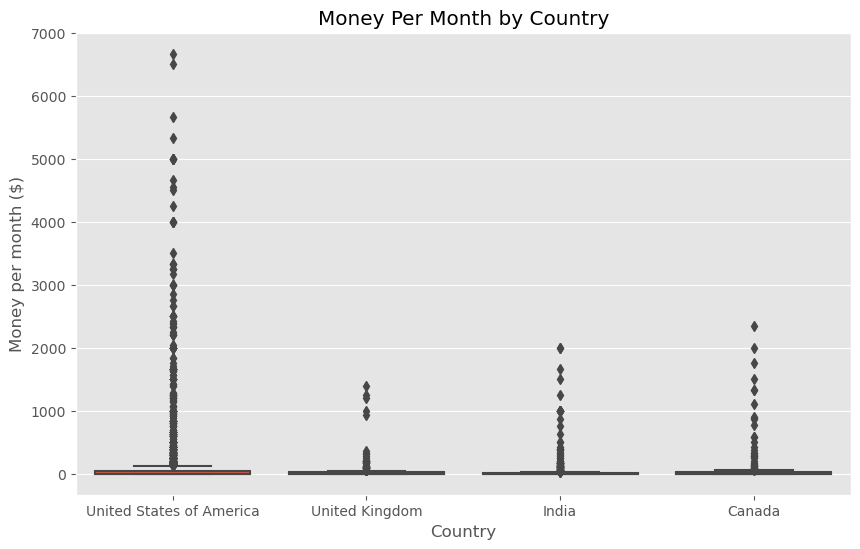

In [48]:
countries_mean = find_mean_value(survey_data_updated,countries)
print('Average amount spend by students in \"US\", \"India\", \"UK\" and \"Canada\"')
print(countries_mean.to_markdown(tablefmt='pretty', headers = ['Countries', 'Money per Month']))

draw_box_plot(survey_data_updated)

### Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly $143).

In [56]:
best_markets = survey_data_updated[survey_data_updated['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

In [58]:
best_markets['CountryLive'].value_counts(normalize = True) * 100

CountryLive
United States of America    74.980754
India                       11.726969
United Kingdom               7.159353
Canada                       6.132923
Name: proportion, dtype: float64

So it's crystal clear what to choose between Canada and India.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.

Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.

Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

### Conclusion
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.
